In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))
from src.text_analysis import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from dotenv import load_dotenv

All imports successful!


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading spanish: Package 'spanish' not found in
[nltk_data]     index


In [2]:
# from docx import Document  # for .docx files
from PyPDF2 import PdfReader  # for PDF files

# def read_docx(file_path):
#     doc = Document(file_path)
#     text = []
#     for paragraph in doc.paragraphs:
#         text.append(paragraph.text)
#     return '\n'.join(text)

def read_pdf(file_path):
    reader = PdfReader(file_path)
    text = []
    for page in reader.pages:
        text.append(page.extract_text())
    return '\n'.join(text)

# Usage example:
file_path = "../data/Slimming en viña.pdf"
pdf_text = read_pdf(file_path)


In [3]:
print(pdf_text[0:400])

Buenas noches quinta Vergara cómo están Buenas noches viña Oh que se ven lindos. Yo estoy muy muy feliz de estar acá, yo estoy cumpliendo un sueño de estar acá en el festival de viña además en su versión solidaria. Solidaria porque ha sido un año difícil, ha sido difícil bu ha sido difícil hasta para la naya fácil que estaba ayudando repartiendo cosas a la gente y la saltaron es como hacerle un po


## Analysis

2. Basic Analysis
Start with importing and preprocessing your text:

In [4]:
# If you have your PDF text in pdf_text variable:
tokens = preprocess_text(pdf_text)

# Get basic statistics
stats = basic_stats(pdf_text)
print("Text Statistics:")
for key, value in stats.items():
    print(f"{key}: {value}")

Text Statistics:
Total de Palabras: 3378
Palabras Únicas: 1673
Diversidad Léxica: 0.49526346950858496


3. Word Frequency Analysis
Analyze the most common words:


Palabras más frecuentes:


,Palabra,Frecuencia
0,weón,88
1,mathi,28
2,casa,26
3,papá,26
4,gente,22
5,dos,19
6,años,19
7,año,18
8,mamá,18
9,tiempo,15


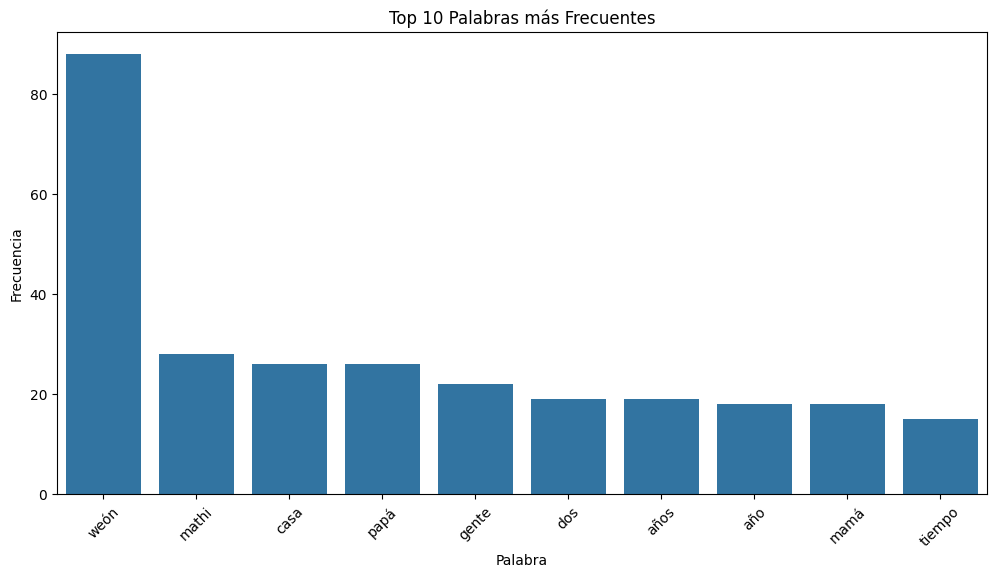

In [5]:
#
# Get top 20 most frequent words
freq_df = word_frequency(tokens,top_n=20, remove_stopwords=False)
print("\nPalabras más frecuentes:")
display(freq_df)

# Visualize top 10 words
plt.figure(figsize=(12, 6))
sns.barplot(data=freq_df.head(10), x='Palabra', y='Frecuencia')  # Changed column names
plt.xticks(rotation=45)
plt.title('Top 10 Palabras más Frecuentes')
plt.show()

4. Zipf's Law Analysis
Verify if your text follows Zipf's law:

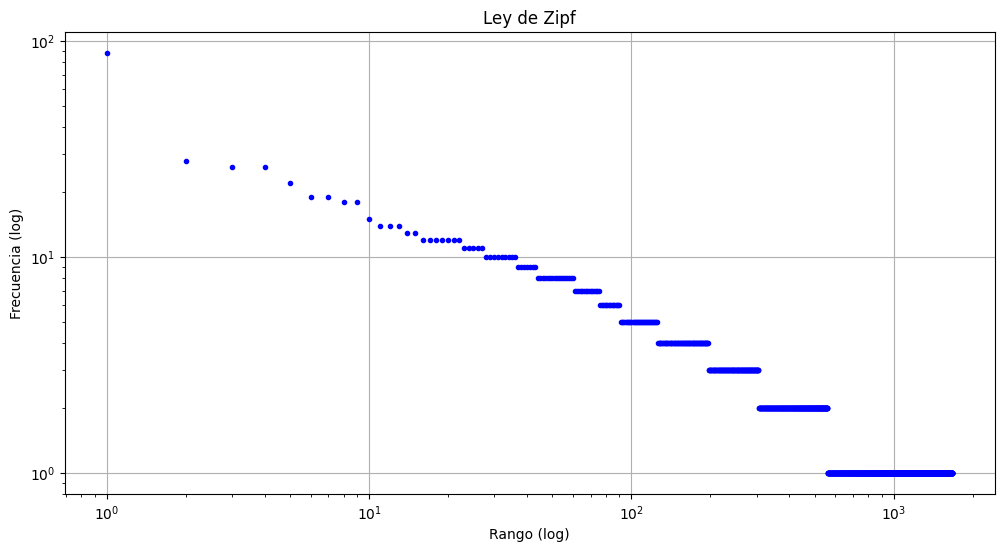

In [6]:
# Create Zipf's law plot
plot_zipf(tokens)
plt.show()

5. Word Cloud Visualization
Generate a visual representation of word frequencies:

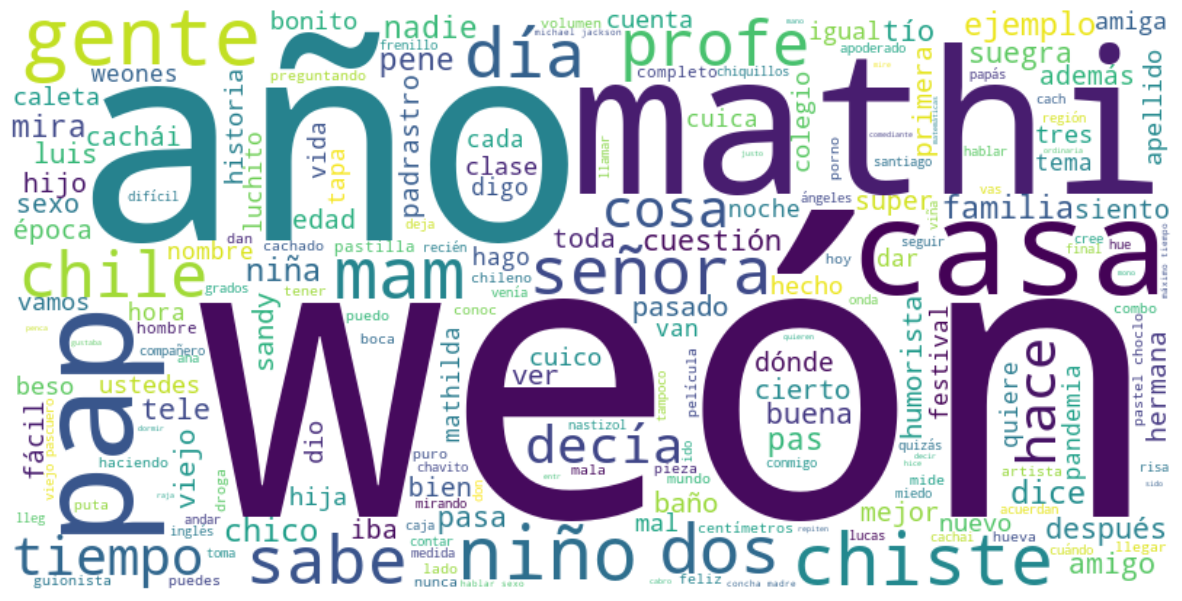

In [7]:
# Create word cloud
generate_wordcloud(' '.join(tokens))
plt.show()

6. Word Length Analysis
Analyze the distribution of word lengths:

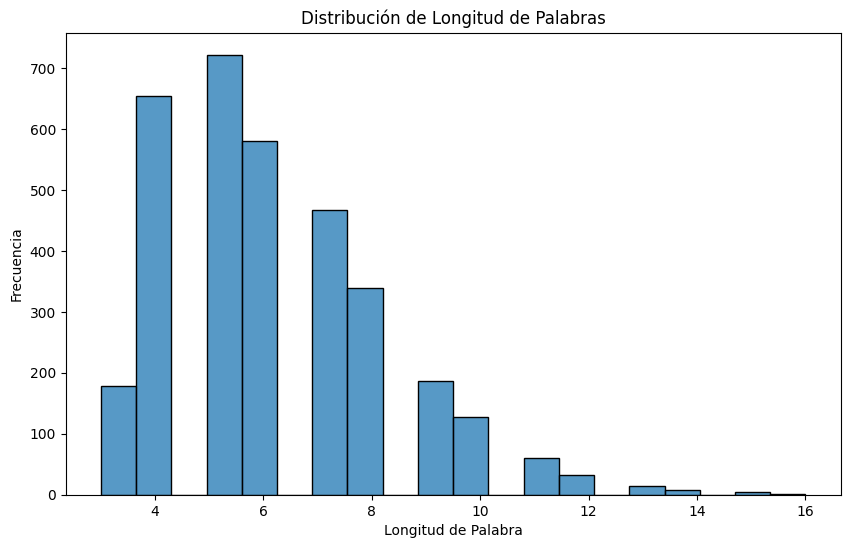

In [8]:
word_length_dist(tokens)
plt.show()

6. Size of tokens

In [9]:
# Calculate average word length
avg_word_length = np.mean([len(word) for word in tokens])
print(f"Average word length: {avg_word_length:.2f} characters")

# Get vocabulary richness
vocabulary_size = len(set(tokens))
print(f"Vocabulary size: {vocabulary_size} unique words")

Average word length: 6.11 characters
Vocabulary size: 1673 unique words


7. Counting specific words

In [10]:
count_specific_words(pdf_text, ['pene','sexo', 'sandy'])

{'sexo': 12, 'pene': 11, 'sandy': 9}

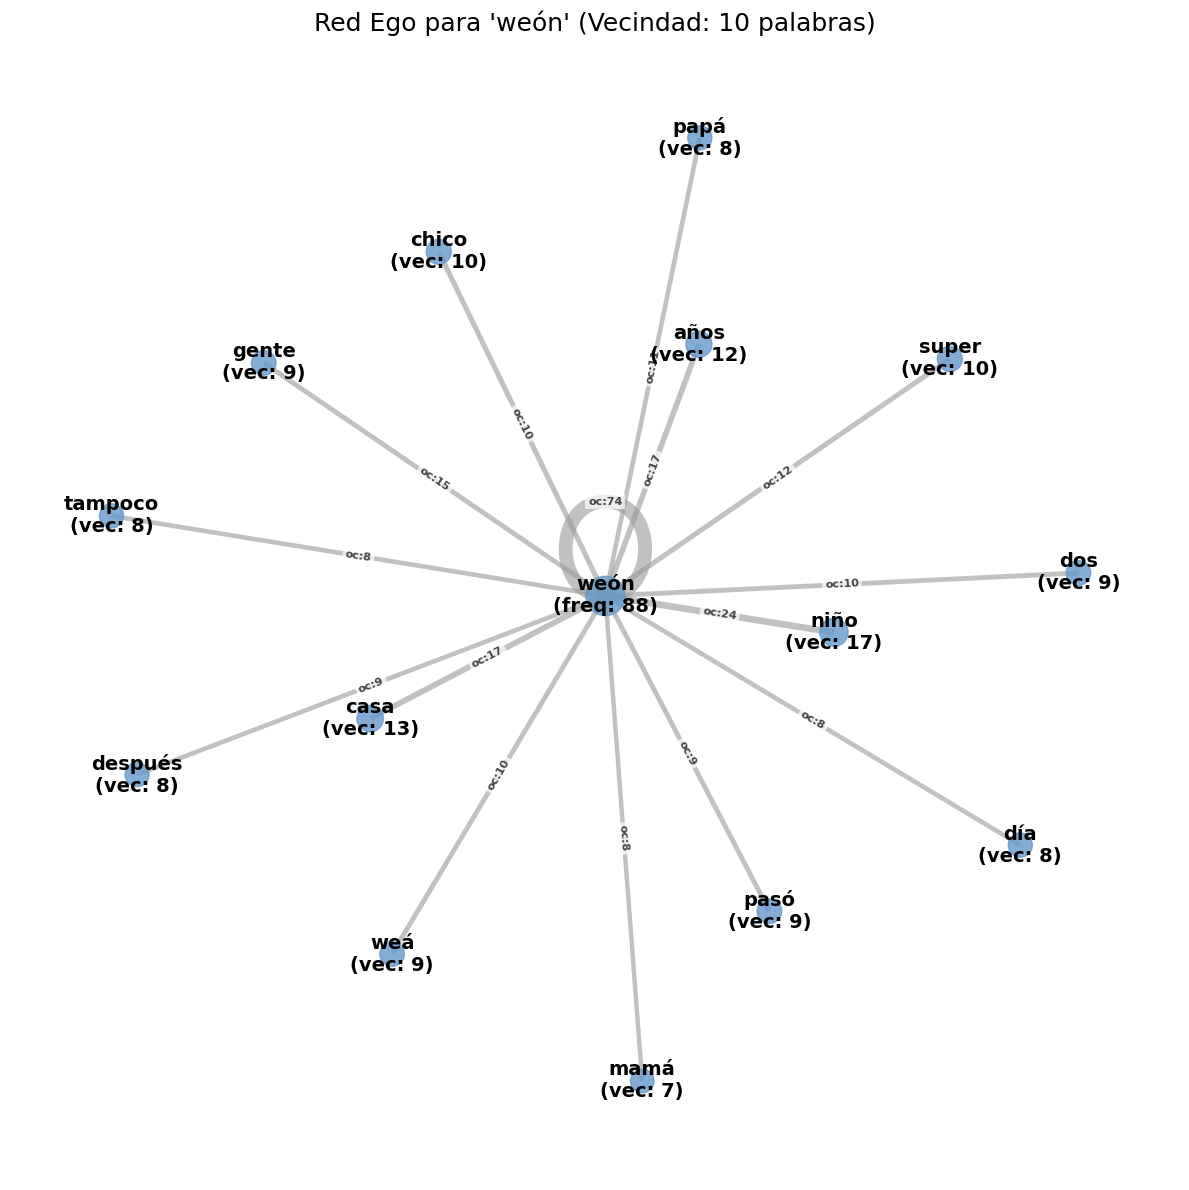

In [11]:
create_word_ego_network(pdf_text, "weón", vicinity_size=10, top_connections=15)

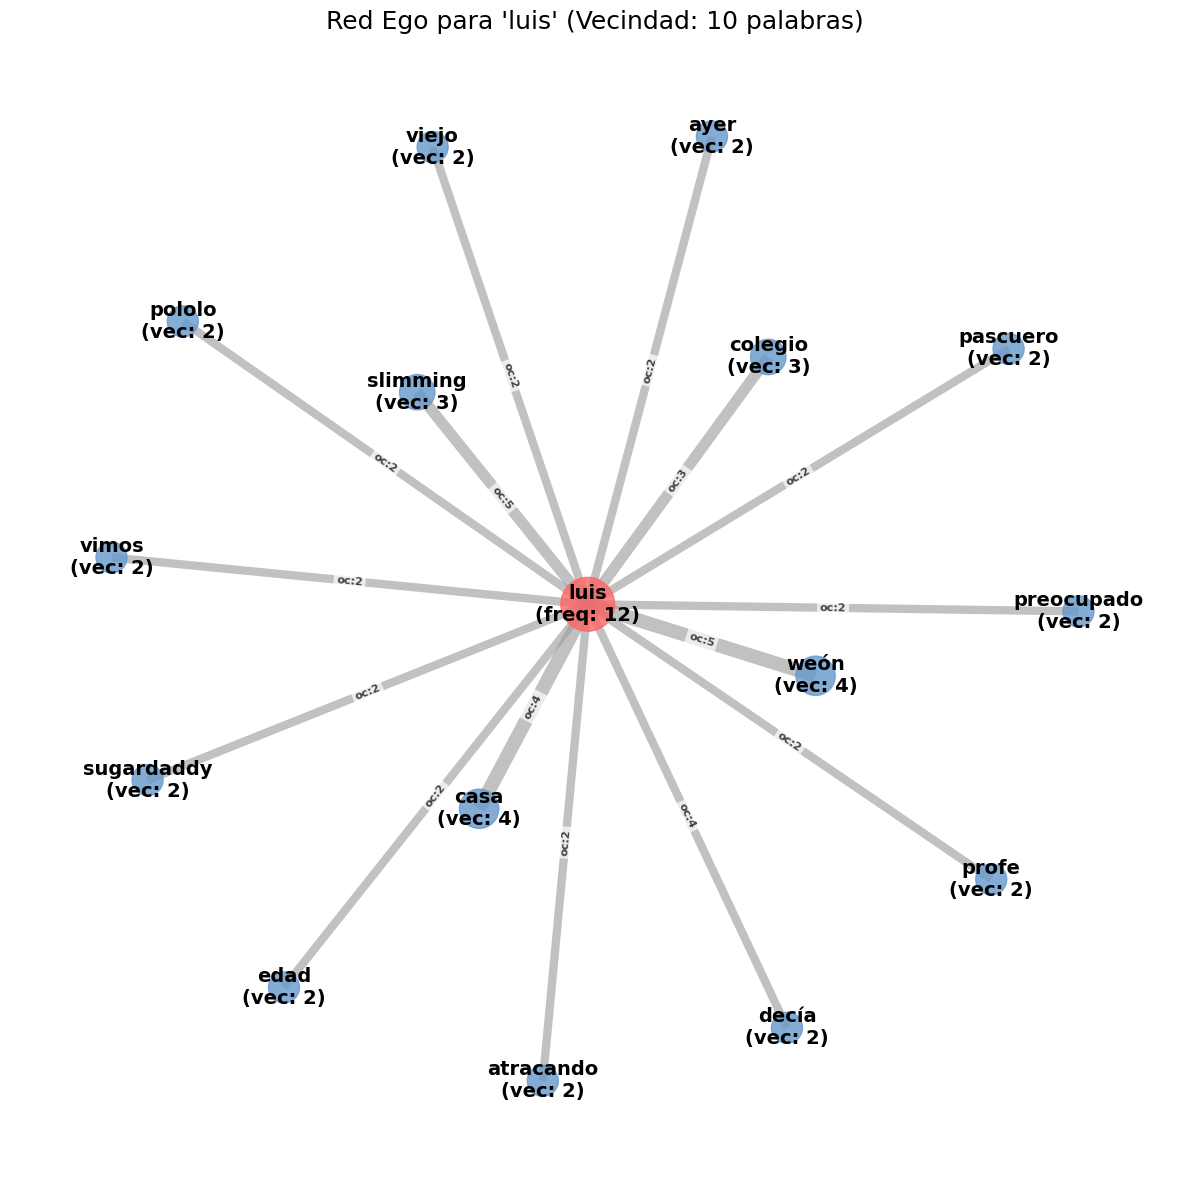

In [12]:
create_word_ego_network(pdf_text, "Luis", vicinity_size=10, top_connections=15)

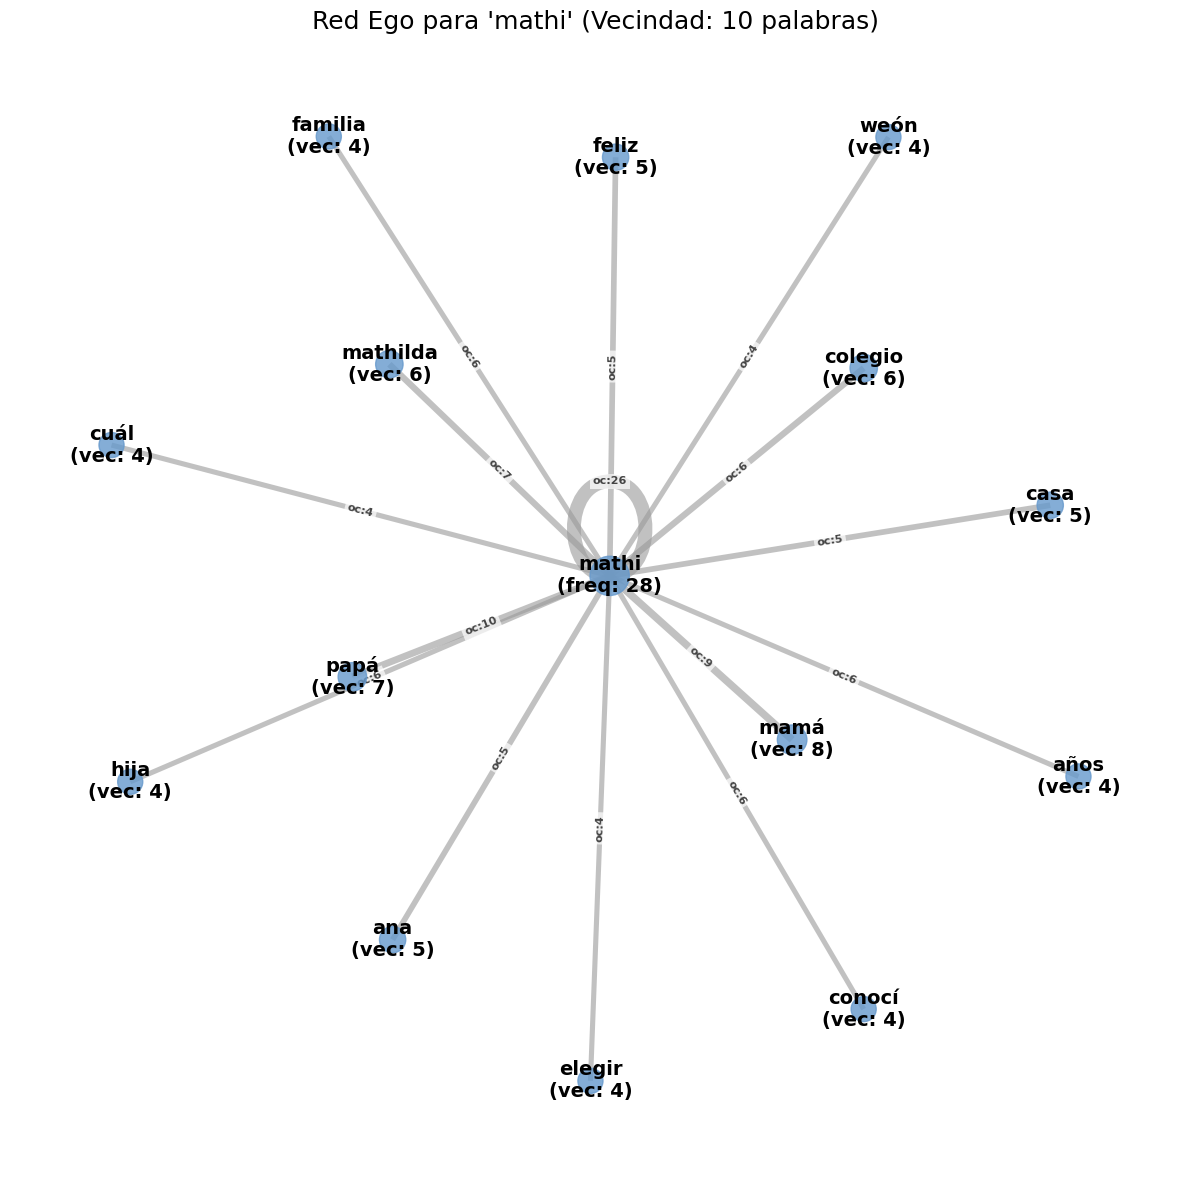

In [13]:
create_word_ego_network(pdf_text, "mathi", vicinity_size=10, top_connections=15)

## Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]    

Análisis de Sentimiento:
Sentimiento general: Neutral
Puntuación compuesta: -0.00


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliocorrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]    

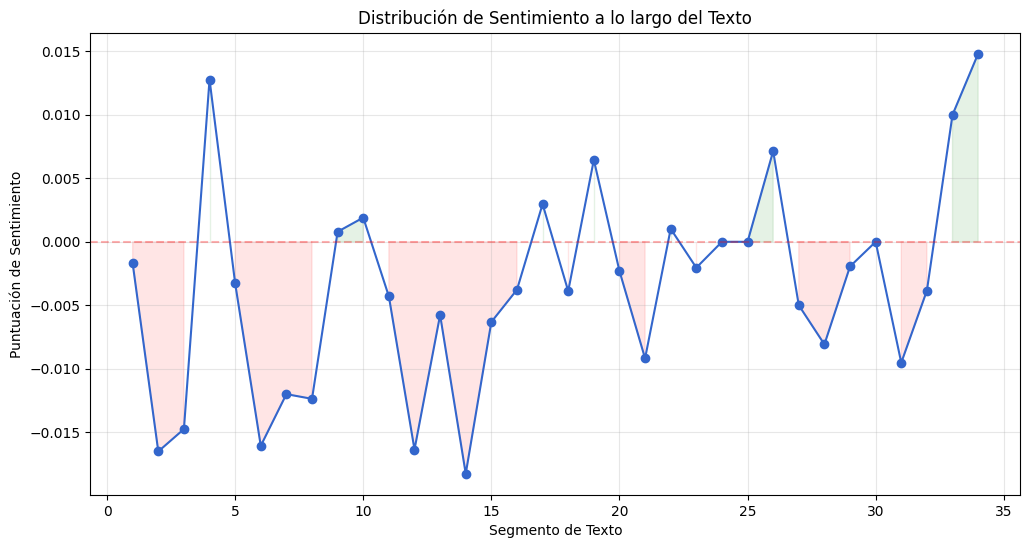

In [14]:
# Analyze sentiment of the entire text
sentiment_results = analyze_sentiment(pdf_text)
print("Análisis de Sentimiento:")
print(f"Sentimiento general: {sentiment_results['sentiment']}")
print(f"Puntuación compuesta: {sentiment_results['compound_score']:.2f}")

# Plot sentiment distribution
plot_sentiment_distribution(pdf_text, chunk_size=300)
plt.show()

In [15]:
# Example usage
target_word = "pene"  # The word you want to track
create_word_evolution_gif(
    text=pdf_text,  # Your full text
    target_word=target_word,
    chunk_size=600,  # Size of each text chunk
    overlap=400,    # Overlap between chunks
    vicinity_size=5,  # Words to consider before/after target
    top_connections=10,  # Top connections to display
    output_gif=f"{target_word}_evolution.gif",
    fps=1 # Frames per second
)

Creating frames: 100%|██████████| 17/17 [00:00<00:00, 20.66it/s]


Creating GIF with 10 frames...
GIF saved as pene_evolution.gif


'pene_evolution.gif'

In [16]:
from src.speech_graph import NaiveGraph, StemGraph, PosGraph

In [29]:
# Create a naive graph
naive_graph = NaiveGraph()
stats, graph = naive_graph.analyze_text(pdf_text)

# Visualize with different layouts
plt = naive_graph.visualize_graph(graph, title="Word Graph", layout='kamada_kawai')
plt.savefig("word_graph_kamada.png", dpi=300, bbox_inches='tight')
plt.show()

# Try circular layout
plt = naive_graph.visualize_graph(graph, title="Word Graph (Circular)", layout='circular')
plt.savefig("word_graph_circular.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/gv/kbzdgdpj5rj0jxkzpp5f93zh0000gn/T/ipykernel_91882/27963140.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/gv/kbzdgdpj5rj0jxkzpp5f93zh0000gn/T/ipykernel_91882/27963140.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [28]:
# The same now but just using informative words
tokens_text = str(' '.join(tokens))
naive_graph = NaiveGraph()
stats, graph = naive_graph.analyze_text(tokens_text)

# Visualize with different layouts
plt = naive_graph.visualize_graph(graph, title="Word Graph", layout='kamada_kawai')
plt.savefig("word_graph_kamada_informative.png", dpi=300, bbox_inches='tight')
plt.show()

# Try circular layout
plt = naive_graph.visualize_graph(graph, title="Word Graph (Circular)", layout='circular')
plt.savefig("word_graph_circular_informative.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/gv/kbzdgdpj5rj0jxkzpp5f93zh0000gn/T/ipykernel_91882/3604038021.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/gv/kbzdgdpj5rj0jxkzpp5f93zh0000gn/T/ipykernel_91882/3604038021.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
